<a href="https://colab.research.google.com/github/ScarrryMary/Project_group24-25/blob/main/Seminar2_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

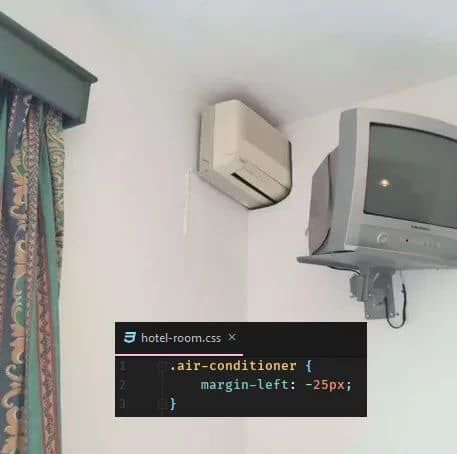

## Generative Adversarial Network (GAN)  

**Генеративно-состязательные сети (GAN)** были представлены Яном Гудфеллоу и его коллегами в 2014 году. GAN — это класс нейронных сетей, которые автономно обучаются шаблонам во входных данных для создания новых примеров, похожих на исходный набор данных.

Архитектура GAN состоит из двух нейронных сетей:

- **Генератор**: создает синтетические данные из случайного шума для получения настолько реалистичных данных, что дискриминатор не может отличить их от реальных данных.

- **Дискриминатор**: выступает в роли критика, оценивая, являются ли полученные данные реальными или поддельными.

Они используют состязательное обучение для создания искусственных данных, идентичных фактическим данным.

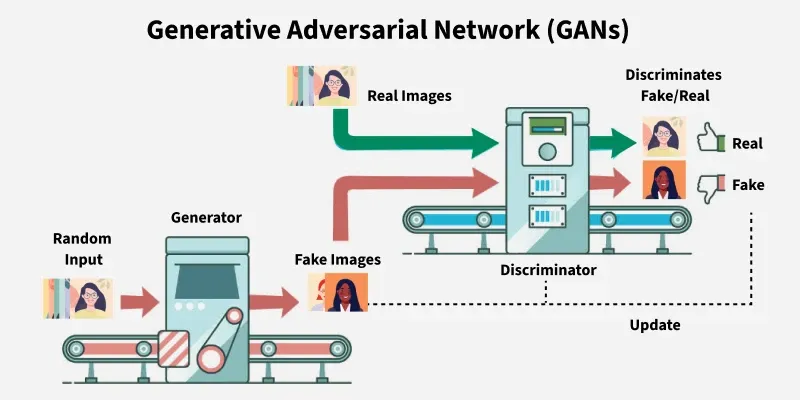

Две сети ведут непрерывную игру в кошки-мышки: генератор улучшает свою способность создавать реалистичные данные, в то время как дискриминатор становится лучше обнаруживать подделки. Со временем этот состязательный процесс приводит к получению высокореалистичных и высококачественных данных.

### Детально проработанная архитектура GAN
Давайте подробно рассмотрим модель генератора и дискриминатора GAN:

1. **Модель генератора**  
Генератор представляет собой глубокую нейронную сеть, которая принимает случайный шум в качестве входных данных для генерации реалистичных образцов данных (например, изображений или текста). Он изучает базовое распределение данных, корректируя его параметры с помощью обратного распространения.

Цель генератора состоит в том, чтобы получить образцы, которые дискриминатор классифицирует как реальные. Функция потерь выглядит следующим образом:


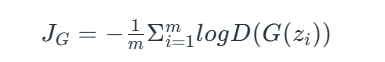

- $J_G$ - насколько хорошо генератор обманывает дискриминатор.
- $log D(G(z_i))$ представляет собой логарифмическую вероятность того, что дискриминатор будет правильным для сгенерированных выборок.
- Генератор стремится свести к минимуму эти потери, стимулируя производство образцов, которые дискриминатор классифицирует как реальные
$log D(G(z_i))$, близкий к 1.

2. **Модель дискриминатора**  
Дискриминатор выступает в роли двоичного классификатора, различая реальные и сгенерированные данные. Он учится улучшать свою способность к классификации с помощью обучения, уточняя свои параметры для более точного обнаружения поддельных образцов.

При работе с данными изображений дискриминатор часто использует сверточные слои или другие релевантные архитектуры, подходящие для данного типа данных. Эти слои помогают извлекать особенности и улучшают способность модели различать реальные и сгенерированные образцы.

Дискриминатор снижает отрицательную логарифмическую вероятность правильной классификации как произведенных, так и реальных образцов. Эта потеря стимулирует дискриминатор точно классифицировать сгенерированные образцы как поддельные и настоящие с помощью следующего уравнения:

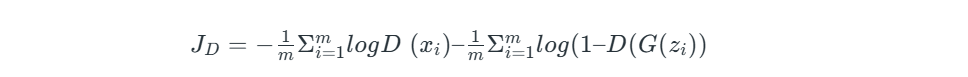

- $J_D$ Оценивает способность дискриминатора различать произведенные и реальные образцы.
- Логарифмическая вероятность того, что дискриминатор точно категоризирует реальные данные, представлена как $log D(x_i)$.
- Логарифмическая вероятность того, что дискриминатор правильно классифицирует сгенерированные образцы как поддельные, представлена как $log D(1 - D(G(z_i)))$.

Минимизируя эти потери, дискриминатор становится более эффективным в различении реальных и сгенерированных образцов.

3. **MinMax Loss**  
GAN следуют минимаксной оптимизации, где генератор и дискриминатор являются противниками:

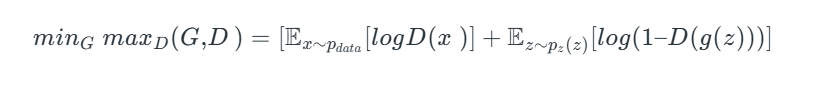

Где

- $G$ — генераторная сеть, а $D$ — дискриминаторная сеть.
- Фактические выборки данных, полученные в результате распределения истинных данных $p_{data}(x)$ представлены $x$.
- Случайный шум на основе выборки из предыдущего распределения
$p_{z}(z)$ (обычно нормальное или равномерное распределение) представлено как $z$.
- $D(x)$ представляет собой вероятность того, что дискриминатор правильно определит фактические данные как реальные.
- $D(G(z))$ — вероятность того, что дискриминатор определит сгенерированные данные, поступающие от генератора, как подлинные.  

Генератор стремится **минимизировать** потери, в то время как дискриминатор пытается **максимизировать** точность своей классификации.



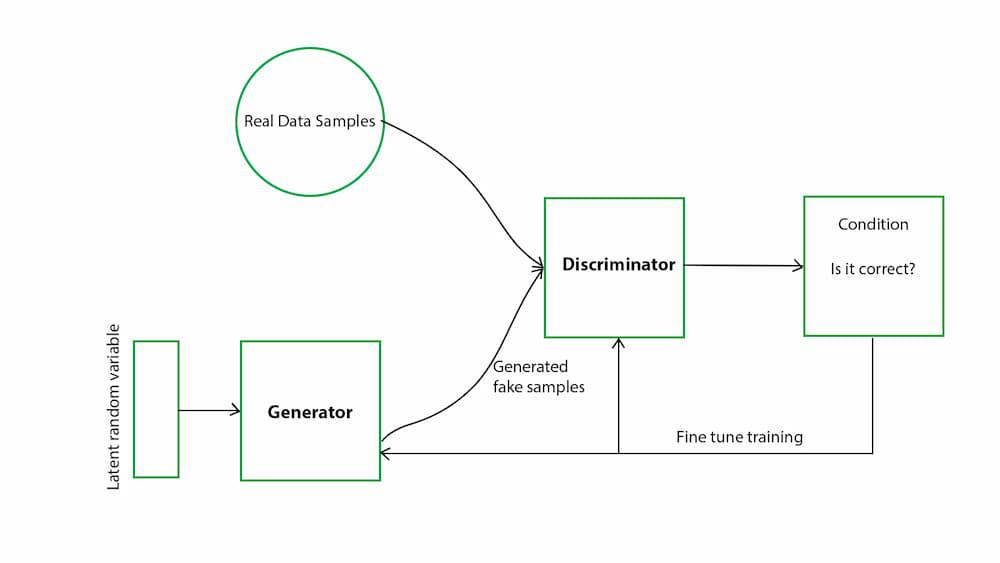

### Как работает GAN?
Давайте разберемся, как генератор (G) и дискриминатор (D) дополняют друг друга, улучшая друг друга с течением времени:

1. **Первый ход генератора**  
G принимает в качестве входных данных случайный вектор шума. Этот вектор шума содержит случайные значения и выступает в качестве отправной точки для процесса создания G. Используя свои внутренние слои и изученные шаблоны, G преобразует вектор шума в новую выборку данных, подобно сгенерированному изображению.

2. **Ход дискриминатора**  
D получает два вида входных данных:

- Реальные выборки данных из обучающего набора данных.
- Выборки данных, сгенерированные G на предыдущем шаге.

Работа D заключается в том, чтобы проанализировать каждый вход и определить, являются ли они реальными данными или чем-то придуманным G. Он выводит оценку вероятности от 0 до 1. Оценка 1 указывает на то, что данные, скорее всего, настоящие, а 0 — на то, что они поддельные.

3. **Состязательное обучение**  
- Если дискриминатор правильно классифицирует реальные данные как настоящие, а фальшивые — как поддельные, это немного усиливает его возможности.
- Если генератору удается обмануть дискриминатор, он получает положительное обновление, в то время как дискриминатор наказывается.

4. **Улучшение генератора**  
Каждый раз, когда дискриминатор ошибочно классифицирует поддельные данные как реальные, генератор учится и совершенствуется. За несколько итераций генератор выдает более убедительные синтетические образцы.

5. **Адаптация дискриминатора**  
Дискриминатор постоянно совершенствует свою способность отличать реальные данные от поддельных. Эта непрерывная дуэль между генератором и дискриминатором улучшает общий процесс обучения модели.

6. **Прогресс в обучении**  
- По мере продолжения обучения генератор становится очень опытным в создании реалистичных данных.
- В конце концов, дискриминатор изо всех сил пытается отличить настоящее от поддельного, что указывает на то, что GAN достиг хорошо обученного состояния.
- На этом этапе генератор можно использовать для генерации высококачественных синтетических данных для различных приложений.

### Типы GAN
1. **Vanilla GAN**  
Vanilla GAN является самым простым типом GAN. Он состоит из:

- Генератор и дискриминатор построены с использованием многослойных перцептронов (MLP).
- Модель оптимизирует свою математическую формулировку с помощью стохастического градиентного спуска (SGD).

В то время как ванильные GAN служат основой для более продвинутых моделей GAN, они часто сталкиваются с такими проблемами, как сворачивание режима и нестабильное обучение.

2. **Conditional GAN (CGAN)**  
Условные GAN (CGAN) вводят дополнительный условный параметр для управления процессом генерации. Вместо того, чтобы генерировать данные случайным образом, CGAN позволяют модели выдавать определенные типы выходных данных.

Работа CGAN:

- Условная переменная (y) подается как в генератор, так и в дискриминатор.
- Это гарантирует, что генератор создает данные, соответствующие заданному условию (например, генерирует изображения конкретных объектов).
- Дискриминатор также получает метки, чтобы помочь отличить настоящие данные от поддельных.

3. **Deep Convolutional GAN (DCGAN)**  
Глубокие сверточные GAN (DCGANs) являются одними из самых популярных и широко используемых типов GAN, особенно для генерации изображений.

Что делает DCGAN особенным?

- Использует сверточные нейронные сети (СНС) вместо простых многослойных персептронов (MLP).
- Слои Max pooling заменены на сверточный шаг, что делает модель более эффективной.
- Полностью соединенные слои удаляются, что позволяет лучше понимать пространственное положение изображений.

DCGAN оказались очень успешными в создании высококачественных изображений, что делает их незаменимым выбором для исследователей глубокого обучения.


4. Laplacian Pyramid GAN (LAPGAN)  
Laplacian Pyramid GAN (LAPGAN) предназначен для создания изображений сверхвысокого качества с использованием подхода с несколькими разрешениями.

Работа LAPGAN:

- Использует несколько пар генератор-дискриминатор на разных уровнях пирамиды Лапласа.
- Изображения сначала уменьшаются на каждом слое пирамиды и снова масштабируются с помощью условных GAN (CGAN).
- Этот процесс позволяет постепенно детализировать изображение, уменьшая шум и повышая четкость.

Благодаря своей способности генерировать изображения с высокой детализацией, LAPGAN считается превосходным подходом для создания фотореалистичных изображений

5. Super-Resolution GAN (SRGAN)
Super-Resolution GAN (SRGAN) специально разработан для увеличения разрешения изображений низкого качества с сохранением деталей.

Работа SRGAN:

- Использует глубокую нейронную сеть в сочетании с состязательной функцией потерь.
- Улучшает изображения с низким разрешением, добавляя более мелкие детали, делая их более четкими и реалистичными.
- Помогает уменьшить распространенные ошибки масштабирования изображения, такие как размытость и пикселизация.

### Реализация генеративно-состязательной сети (GAN) с использованием PyTorch
Давайте рассмотрим реализацию генеративно-состязательной сети (GAN). Наш GAN будет обучен на наборе данных CIFAR-10 для создания реалистичных изображений.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


**Шаг 2: Определение преобразований изображений**  
Мы используем преобразования PyTorch для нормализации и преобразования изображений в тензоры перед их подачей в модель.

In [ ]:
# Define a basic transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

**Шаг 3: Загрузка набора данных CIFAR-10**  
Набор данных CIFAR-10 загружается с предопределенными преобразованиями. Создается DataLoader для обработки набора данных в мини-пакетах по 32 изображения, перемешиваемых на случайность.

In [ ]:
train_dataset = datasets.CIFAR10(root='./data',\
              train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(train_dataset, \
                                batch_size=32, shuffle=True)

**Шаг 4: Определение гиперпараметров GAN**  
Определены ключевые гиперпараметры:

- latent_dim – Размерность вектора шума.
- lr – Скорость обучения оптимизатора.
- beta1, beta2 – коэффициенты оптимизатора Адама.
- num_epochs – Общее количество итераций обучения.

In [ ]:
# Hyperparameters
latent_dim = 100
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
num_epochs = 2

**Шаг 5: Сборка генератора**  
Генератор принимает случайный латентный вектор (z) в качестве входных данных и преобразует его в изображение с помощью слоев свертки, пакетной нормализации и повышающей дискретизации. В конечном итоге используется активация Tanh, чтобы убедиться, что значения пикселей находятся в пределах ожидаемого диапазона.

In [ ]:
# Define the generator
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128 * 8 * 8),
            nn.ReLU(),
            nn.Unflatten(1, (128, 8, 8)),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128, momentum=0.78),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.78),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img

Генератор состоит из последовательных слоёв:

① **nn.Linear(latent_dim, 128 * 8 * 8)**  
Преобразует входной вектор z (размерности latent_dim) в тензор размера 128*8*8 (например, 8192 значений).

Это "развёрнутый" вариант будущей карты признаков 128x8x8.

② **nn.ReLU()**  
Функция активации ReLU (выпрямитель), добавляющая нелинейность:

`ReLU(x) = max(0, x)`

③ **nn.Unflatten(1, (128, 8, 8))**  
Преобразует тензор из (batch_size, 128*8*8) в (batch_size, 128, 8, 8).

Теперь данные имеют форму, пригодную для свёрточных слоёв: 128 каналов, высота 8, ширина 8.

④ **Первый апсемплинг и свёртка**  
```
nn.Upsample(scale_factor=2),           # Увеличивает размер до 16x16
nn.Conv2d(128, 128, kernel_size=3, padding=1),  # Свёртка 3x3 (сохраняет размер)
nn.BatchNorm2d(128, momentum=0.78),    # Нормализует активации
nn.ReLU()                              # Нелинейность

```
- Upsample: Удваивает размер карты признаков (с 8x8 до 16x16).

- Conv2d: Свёрточный слой, обрабатывающий данные (размер остаётся 16x16 из-за padding=1).

- BatchNorm: Ускоряет обучение, стабилизируя распределение активаций.

- ReLU: Активация.

⑤ **Второй апсемплинг и свёртка**
```
nn.Upsample(scale_factor=2),           # Увеличивает размер до 32x32
nn.Conv2d(128, 64, kernel_size=3, padding=1),   # Уменьшает каналы до 64
nn.BatchNorm2d(64, momentum=0.78),
nn.ReLU()
```
Теперь размер карты признаков — 64x32x32.

⑥ **Финальная свёртка** (nn.Conv2d(64, 3, kernel_size=3, padding=1))
- Преобразует 64 канала в 3 RGB-канала (для цветного изображения).

- nn.Tanh() сжимает значения пикселей в диапазон [-1, 1] (стандарт для GAN).

**Как работает forward?**
- На вход подаётся z (размерности latent_dim).

- На выходе — изображение (размер зависит от архитектуры, здесь предположительно 3x32x32)

**Визуализация преобразований:**

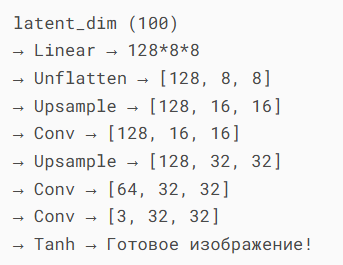

- Upsample увеличивает пространственные размеры (из 8x8 в 32x32).

- Conv2d + BatchNorm улучшают качество генерации.

- Tanh обеспечивает корректный диапазон пикселей ([-1, 1]).

**Шаг 6: Создание дискриминатора**  
Дискриминатор — это двоичный классификатор, который различает реальные и сгенерированные изображения. Он состоит из сверточных слоев, пакетной нормализации, отсева и активации LeakyReLU для повышения стабильности обучения.

In [ ]:
# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.25),
        nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
        nn.ZeroPad2d((0, 1, 0, 1)),
        nn.BatchNorm2d(64, momentum=0.82),
        nn.LeakyReLU(0.25),
        nn.Dropout(0.25),
        nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(128, momentum=0.82),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.25),
        nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256, momentum=0.8),
        nn.LeakyReLU(0.25),
        nn.Dropout(0.25),
        nn.Flatten(),
        nn.Linear(256 * 5 * 5, 1),
        nn.Sigmoid()
    )

    def forward(self, img):
        validity = self.model(img)
        return validity

① **Первый свёрточный блок**  
```
nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
nn.LeakyReLU(0.2),
nn.Dropout(0.25),
```
- Conv2d(3, 32, kernel_size=3, stride=2, padding=1)
- - Вход: 3 канала (RGB), выход: 32 канала.

- - stride=2 → уменьшает размер вдвое (например, 32x32 → 16x16).

- - padding=1 сохраняет чётность размеров.

- LeakyReLU(0.2)

- - Нелинейность с "утечкой" (отрицательные значения умножаются на 0.2).

- - Помогает избежать "мёртвых нейронов".

- Dropout(0.25)

- - Случайно "выключает" 25% нейронов для борьбы с переобучением.

② **Второй свёрточный блок**  
```
nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
nn.ZeroPad2d((0, 1, 0, 1)),  # Добавляет нули справа и снизу
nn.BatchNorm2d(64, momentum=0.82),
nn.LeakyReLU(0.25),
nn.Dropout(0.25)
```
- Conv2d(32, 64, kernel_size=3, stride=2, padding=1)

- - Увеличивает глубину до 64 каналов, уменьшает размер (16x16 → 8x8).

- ZeroPad2d((0, 1, 0, 1))

- - Добавляет нули справа и снизу (например, 8x8 → 9x9).

- - Нужно для корректного размера после следующего stride=2.

- BatchNorm2d

- - Нормализует активации, ускоряя обучение.

- LeakyReLU и Dropout

- - Аналогично предыдущему блоку.



③ **Третий свёрточный блок**  
```
nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
nn.BatchNorm2d(128, momentum=0.82),
nn.LeakyReLU(0.2),
nn.Dropout(0.25),
```
- Conv2d(64, 128, ...)

- - Увеличивает глубину до 128, уменьшает размер (9x9 → 5x5).

- Остальные слои аналогичны.

④ **Четвёртый свёрточный блок**
```
nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
nn.BatchNorm2d(256, momentum=0.8),
nn.LeakyReLU(0.25),
nn.Dropout(0.25),
```
- Conv2d(128, 256, ...)

- - Увеличивает глубину до 256, но не меняет размер (stride=1).

- - Используется для извлечения сложных признаков.

⑤ **Финальные слои (классификация)**  
```
nn.Flatten(),
nn.Linear(256 * 5 * 5, 1),  # 256 каналов * 5x5
nn.Sigmoid()
```
- Flatten()

- - Преобразует [batch, 256, 5, 5] в [batch, 256*5*5].

- Linear(256* 5 * 5, 1)

- - Полносвязный слой, выдающий одно число (логит).

- Sigmoid()

- - Преобразует логит в вероятность [0, 1] (где 1 = "настоящее изображение").

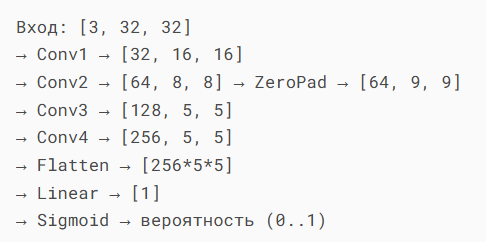

**Шаг 7: Инициализация компонентов GAN**  
- Генератор и дискриминатор инициализируются на доступном устройстве (GPU или CPU).
- В качестве функции потерь выбирается двоичная кросс-энтропия (BCE) Loss.
- Оптимизаторы Адама определяются отдельно для генератора и дискриминатора с заданными скоростями обучения и бета.

In [ ]:
# Define the generator and discriminator
# Initialize generator and discriminator
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)
# Loss function
adversarial_loss = nn.BCELoss()
# Optimizers
optimizer_G = optim.Adam(generator.parameters()\
                         , lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters()\
                         , lr=lr, betas=(beta1, beta2))

**Шаг 8: Обучение GAN**  
- Дискриминатор обучен различать настоящие и поддельные изображения.
- Генератор обучен создавать реалистичные изображения, которые обманывают дискриминатор.
- С помощью оптимизаторов Адама происходит обратное распространение потерь, и модель обновляет свои параметры.
- Отслеживание прогресса: Значения потерь для обеих сетей печатаются, а сгенерированные изображения отображаются каждые 10 эпох для визуального контроля.

Epoch [1/2]                        Batch 100/1563 Discriminator Loss: 0.6112 Generator Loss: 1.1241
Epoch [1/2]                        Batch 200/1563 Discriminator Loss: 0.6997 Generator Loss: 0.7499
Epoch [1/2]                        Batch 300/1563 Discriminator Loss: 0.6804 Generator Loss: 0.9481
Epoch [1/2]                        Batch 400/1563 Discriminator Loss: 0.7714 Generator Loss: 1.2390
Epoch [1/2]                        Batch 500/1563 Discriminator Loss: 0.5814 Generator Loss: 0.7660
Epoch [1/2]                        Batch 600/1563 Discriminator Loss: 0.7580 Generator Loss: 0.9638
Epoch [1/2]                        Batch 700/1563 Discriminator Loss: 0.6718 Generator Loss: 0.8439
Epoch [1/2]                        Batch 800/1563 Discriminator Loss: 0.6504 Generator Loss: 0.9983
Epoch [1/2]                        Batch 900/1563 Discriminator Loss: 0.5394 Generator Loss: 1.2107
Epoch [1/2]                        Batch 1000/1563 Discriminator Loss: 0.6522 Generator Loss: 0.8813

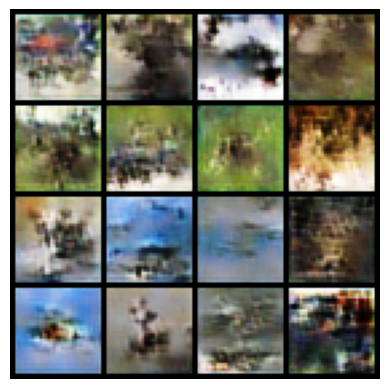

In [ ]:
# Training loop
for epoch in range(num_epochs):
    for i, batch in enumerate(dataloader):
       # Convert list to tensor
        real_images = batch[0].to(device)
        # Adversarial ground truths
        valid = torch.ones(real_images.size(0), 1, device=device)
        fake = torch.zeros(real_images.size(0), 1, device=device)
        # Configure input
        real_images = real_images.to(device)

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()
        # Sample noise as generator input
        z = torch.randn(real_images.size(0), latent_dim, device=device)
        # Generate a batch of images
        fake_images = generator(z)

        # Measure discriminator's ability
        # to classify real and fake images
        real_loss = adversarial_loss(discriminator\
                                     (real_images), valid)
        fake_loss = adversarial_loss(discriminator\
                                     (fake_images.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        # Backward pass and optimize
        d_loss.backward()
        optimizer_D.step()

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()
        # Generate a batch of images
        gen_images = generator(z)
        # Adversarial loss
        g_loss = adversarial_loss(discriminator(gen_images), valid)
        # Backward pass and optimize
        g_loss.backward()
        optimizer_G.step()
        # ---------------------
        #  Progress Monitoring
        # ---------------------
        if (i + 1) % 100 == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}]\
                        Batch {i+1}/{len(dataloader)} "
                f"Discriminator Loss: {d_loss.item():.4f} "
                f"Generator Loss: {g_loss.item():.4f}"
            )
    # Save generated images for every epoch
    if (epoch + 1) % 2 == 0:
        with torch.no_grad():
            z = torch.randn(16, latent_dim, device=device)
            generated = generator(z).detach().cpu()
            grid = torchvision.utils.make_grid(generated,\
                                        nrow=4, normalize=True)
            plt.imshow(np.transpose(grid, (1, 2, 0)))
            plt.axis("off")
            plt.show()

### GAN using Keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.layers import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam,SGD

**2. Загрузка и предварительная обработка набора данных**  
Здесь мы загрузим набор данных CIFAR-10 и отфильтруем изображения, включив в них только определенный класс (класс 8).

- keras.datasets.cifar10.load_data(): Загружает набор данных CIFAR-10, который содержит 60 000 цветных изображений 32×32 в 10 классах.
- X[y.flatten() == 8]: Отфильтровывает только изображения класса 8.

In [ ]:
(X, y), (_, _) = keras.datasets.cifar10.load_data()

X = X[y.flatten() == 8]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**3. Определение формы ввода и скрытой размерности**  
Он определяет форму входного изображения и размер латентного вектора.

- image_shape: Определяет форму входного изображения (32×32 с 3 цветовыми каналами).
- latent_dimensions: Определяет размер скрытого вектора, т.е. входного шума для генератора.

In [ ]:
image_shape = (32, 32, 3)
latent_dimensions = 100

**4. Сборка генератора**  
Он определяет генератор, который принимает случайный шум в качестве входных данных и выводит изображение.

- **Dense**: Полностью связанный слой, используемый для преобразования латентного вектора в представление более высокой размерности.

- **Reshape**: Изменяет форму выходных данных , чтобы сделать их пригодными для свертки.Dense

- **UpSampling2D**: Повышает дискретизацию изображения до более высокого разрешения.

- **Conv2D**: сверточные слои для обработки изображения и создания признаков.

- **Activation("tanh")**: Функция активации, которая гарантирует, что значения пикселей сгенерированного изображения находятся в диапазоне [-1, 1] при использовании tanh.

In [ ]:
def build_generator():
    model = Sequential()

    model.add(Dense(128 * 8 * 8, activation="relu", input_dim=latent_dimensions))
    model.add(Reshape((8, 8, 128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.78))
    model.add(Activation("relu"))

    model.add(UpSampling2D())
    model.add(Conv2D(64, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.78))
    model.add(Activation("relu"))

    model.add(Conv2D(3, kernel_size=3, padding="same"))
    model.add(Activation("tanh"))

    noise = Input(shape=(latent_dimensions,))
    image = model(noise)

    return Model(noise, image)

**5. Построение дискриминатора**  
Здесь мы определим дискриминатор, который классифицирует изображения как настоящие или поддельные.

- **Conv2D**: сверточные слои, используемые для извлечения признаков из изображений.

- **LeakyReLU**: Функция активации, которая допускает небольшой наклон для отрицательных значений.

- **Dropout**: Метод регуляризации, который помогает предотвратить переобучение.

- **Flatten**: Преобразует изображение в 1D-вектор для классификации.

- **Dense**: полностью соединенный слой для классификации изображения как настоящего или поддельного.

In [ ]:
def build_discriminator():
    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=image_shape, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(BatchNormalization(momentum=0.82))
    model.add(LeakyReLU(alpha=0.25))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.82))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.25))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    image = Input(shape=image_shape)
    validity = model(image)

    return Model(image, validity)

**6. Отображение сгенерированных изображений**  
Здесь мы будем визуализировать изображения, сгенерированные генератором.

- plt.subplots: Создает сетку подплотов для отображения нескольких изображений.

- 0,5 * generated_images + 0,5: Возвращает сгенерированные изображения в диапазон [0, 1].

In [ ]:
def display_images():
    r, c = 4,4
    noise = np.random.normal(0, 1, (r * c,latent_dimensions))
    generated_images = generator.predict(noise)

    generated_images = 0.5 * generated_images + 0.5

    fig, axs = plt.subplots(r, c)
    count = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(generated_images[count, :,:,])
            axs[i,j].axis('off')
            count += 1
    plt.show()
    plt.close()

**7. Построение и компиляция дискриминатора**  
Мы построим и скомпилируем дискриминатор и его веса для обучения комбинированной модели.

- Adam(0.0002, 0.5): оптимизатор Adam с определенной скоростью обучения и значениями бета.
- Для расчета убытков мы будем использовать бинарную кроссэнтропию.
- trainable = False: замораживает веса дискриминатора таким образом, чтобы во время обучения объединенной модели обучался только генератор.

In [ ]:
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
                    optimizer=Adam(0.0002,0.5),
                    metrics=['accuracy'])

discriminator.trainable = False

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


**8. Построение комбинированной модели**  
Мы создадим комбинированную модель GAN, подключив генератор и дискриминатор.

- combined_network: Модель, которая принимает шум в качестве входных данных, генерирует изображение, а затем проверяет, является ли изображение реальным или поддельным с помощью дискриминатора.

In [ ]:
generator = build_generator()

z = Input(shape=(latent_dimensions,))
image = generator(z)

valid = discriminator(image)

combined_network = Model(z, valid)
combined_network.compile(loss='binary_crossentropy',
                        optimizer=Adam(0.0002,0.5))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**9. Обучение GAN**  
Мы будем обучать GAN, чередуя обучение дискриминатора и генератора.

- train_on_batch: обучает модели на основе одного пакета данных.
- discriminator.train_on_batch: Обучает дискриминатор на реальных и поддельных изображениях.
- combined_network.train_on_batch: Обучает генератор создавать изображения, которые могут обмануть дискриминатор.
- Мы будем использовать размер партии 32.
- Мы будем использовать 12 500 эпох для обучения и будем отображать результаты через каждые 2500 эпох, чтобы увидеть разницу.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


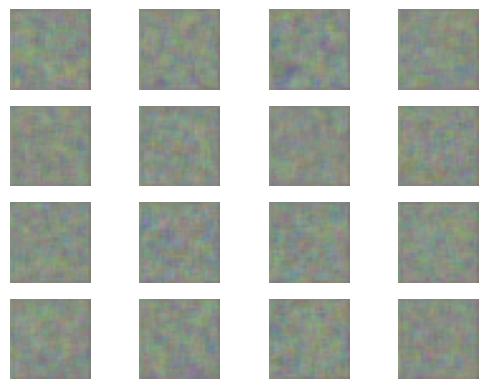

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

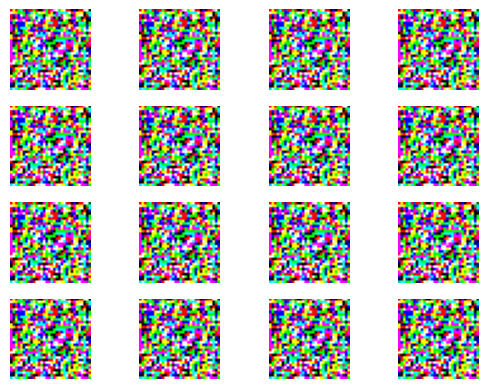

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
num_epochs = 12500
batch_size = 32
display_interval = 2500
losses = []

X = (X / 127.5) - 1.

valid = np.ones((batch_size, 1))
valid += 0.05 * np.random.random(valid.shape)
fake = np.zeros((batch_size, 1))
fake += 0.05 * np.random.random(fake.shape)

for epoch in range(num_epochs):
    index = np.random.randint(0, X.shape[0], batch_size)
    images = X[index]

    noise = np.random.normal(0, 1, (batch_size, latent_dimensions))
    generated_images = generator.predict(noise)

    discm_loss_real = discriminator.train_on_batch(images, valid)
    discm_loss_fake = discriminator.train_on_batch(generated_images, fake)
    discm_loss = 0.5 * np.add(discm_loss_real, discm_loss_fake)

    genr_loss = combined_network.train_on_batch(noise, valid)

    if epoch % display_interval == 0:
        display_images()

Мы можем наблюдать, что с каждым интервалом в 2500 эпох качество генерируемых изображений значительно улучшается. Это постепенное усовершенствование показывает, как генератор постепенно учится создавать более реалистичные изображения по мере продвижения обучения.

Хотя это простой пример, GAN могут быть расширены с помощью более сложных архитектур, включая сверточные слои для генерации изображений. Сочетая генератор и дискриминатор в конкурентной конфигурации, GAN позволяют создавать реалистичные синтетические изображения из случайного шума. Вы можете изучить расширенные варианты GAN, такие как CycleGAN, StyleGAN и условные GAN, которые используются для таких задач, как создание изображений с высоким разрешением, перенос стилей и многое другое.

### Применение генеративно-состязательных сетей (GAN)
- **Синтез и генерация изображений**: GAN генерируют реалистичные изображения, аватары и визуальные эффекты с высоким разрешением, обучаясь шаблонам на обучающих данных. Они широко используются в искусстве, играх и дизайне на основе искусственного интеллекта.

- **Преобразование изображений в изображения**: GAN могут преобразовывать изображения между доменами, сохраняя при этом ключевые функции. Примеры включают преобразование дневных изображений в ночные, эскизы в реалистичные изображения или изменение художественных стилей.

- **Синтез текста в изображение**: GAN создают визуальные эффекты на основе текстовых описаний, что позволяет применять их в искусстве, созданном искусственным интеллектом, автоматизированном дизайне и создании контента.

- **Дополнение данных**: GAN генерируют синтетические данные для улучшения моделей машинного обучения, делая их более надежными и обобщаемыми, особенно в полях с ограниченным количеством помеченных данных.

- **Улучшение изображения с высоким разрешением**: GAN повышают качество изображений с низким разрешением, повышая четкость для таких приложений, как медицинская визуализация, спутниковые снимки и улучшение видео.

### Преимущества GAN
Преимущества GAN заключаются в следующем:

- **Генерация синтетических данных**: GAN могут генерировать новые синтетические данные, которые напоминают некоторое известное распределение данных, что может быть полезно для дополнения данных, обнаружения аномалий или творческих приложений.

- **Высококачественные результаты**: GAN могут выдавать высококачественные, фотореалистичные результаты при синтезе изображений, видео, синтезе музыки и других задачах.

- **Обучение без учителя**: GAN можно обучать без размеченных данных, что делает их подходящими для задач обучения без учителя, где размеченных данных мало или их трудно получить.

- **Универсальность**: GAN могут применяться для широкого спектра задач, включая синтез изображений, синтез текста в изображение, перевод изображения в изображение, обнаружение аномалий, дополнение данных и другие.

## Автоэнкодеры в машинном обучении

**Автоэнкодер** — это тип искусственной нейронной сети, которая учится представлять данные в сжатом виде, а затем реконструирует их максимально близко к исходным входным данным.

Автоэнкодеры состоят из двух компонентов:

- **Энкодер**: Этот инструмент сжимает входные данные в компактное представление и захватывает наиболее важные функции.
- **Декодер**: Он реконструирует входные данные из этой сжатой формы, чтобы сделать их максимально похожими на исходные входные данные.

Например, если входными данными является зашумленное изображение рукописных цифр, автоэнкодер может научиться удалять шум, сжимая изображение в меньший набор функций и восстанавливая более чистую версию исходного изображения.

Автоэнкодеры стремятся свести к минимуму ошибку реконструкции, которая представляет собой разницу между входом и восстановленным выходом. Они используют функции потерь, такие как среднеквадратичная ошибка (MSE) или двоичная кросс-энтропия (BCE), и оптимизируют за счет обратного распространения и градиентного спуска. Они используются в таких приложениях, как обработка изображений, обнаружение аномалий, удаление шумов и извлечение признаков

### Архитектура автоэнкодера в глубоком обучении
Архитектура автоэнкодера состоит из трех основных компонентов: энкодера, узкого места (скрытого пространства) и декодера. Давайте углубимся в каждую часть, чтобы понять, как они работают вместе.

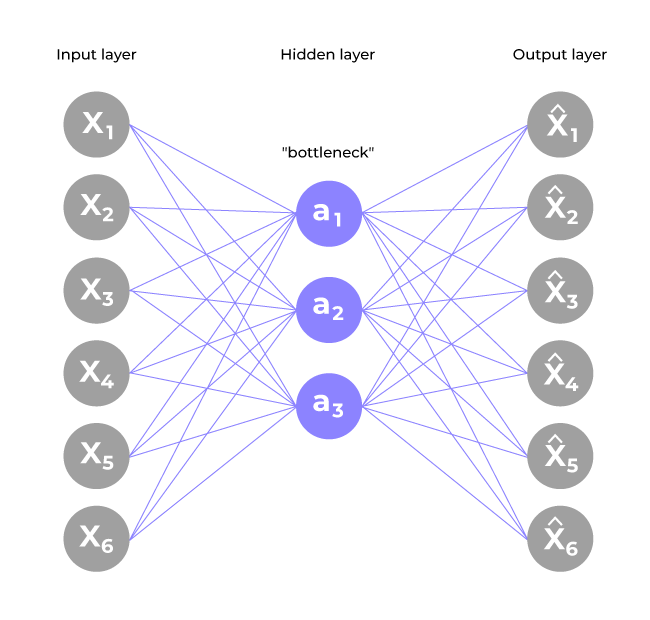

**1. Энкодер**  
Кодировщик — это часть сети, которая принимает входные данные и сжимает их в меньшее представление более низкой размерности.

- *Входной слой*: Здесь исходные данные поступают в сеть, например, изображение или набор объектов.
- *Скрытые слои*: Эти слои применяют преобразования к входным данным. Цель кодировщика — извлечь важные функции и уменьшить размерность данных.
- *Выходные данные кодировщика (латентное пространство)*: Кодировщик выводит сжатую версию данных, часто называемую латентным представлением или кодированием. Это сжатая версия ввода, в которой сохранены только важные функции.

**2. bottleneck (латентное пространство)**  
bottleneck — это самый маленький слой сети, на котором данные представлены в наиболее сжатой форме. Его часто называют латентным пространством или кодом.

- Этот слой содержит сокращенный набор признаков, представляющих наиболее важную информацию из входных данных.
- Идея заключается в том, что с помощью этого сжатия сеть изучает ключевые шаблоны и структуры входных данных.

**3. Декодер**  
Декодер отвечает за взятие сжатого представления из латентного пространства и его восстановление в исходную форму данных.

- *Скрытые слои*: Декодер использует ряд слоев для постепенного расширения сжатых данных до исходных входных размеров.
- *Выходной слой*: Этот слой создает восстановленные данные и стремится максимально похожую на входные данные.

Продолжение: https://www.geeksforgeeks.org/auto-encoders/  
Больше: https://www.geeksforgeeks.org/how-autoencoders-works/.

## NLP (Natural Language Processing)- обработка естественного языка  

**NLP (natural language processing)**, или обработка естественного языка, — это область искусственного интеллекта, задача которой — дать компьютерам возможность понимать и обрабатывать естественный язык. Это тот язык, который мы — люди — используем для общения между собой.

**NLP** как наука находится на стыке компьютерной лингвистики и технологии машинного обучения. С помощью обработки естественного языка компьютеры учатся вести беседы, отвечать на вопросы, переводить текст на разные языки или генерировать их с нуля. Машинам можно передать рутинные задачи, например попросить автоматически классифицировать заявки в службу поддержки по темам или языкам, на которых они написаны, отправляя их сразу к нужному специалисту.

### Задачи NLP
С помощью NLP можно решить множество задач, связанных с обработкой естественного языка.

**Распознавание речи**. Компьютер может переводить голосовую речь в текст. Это требуется для любого приложения, которое выполняет голосовые команды или общается с человеком в чате. Например, так работают умные колонки с голосовым помощником Алисой.

**Генерация естественного языка**. Перевод структурированных, то есть табличных, данных, в текст на естественном языке. Можно сказать, что эта задача противоположна распознаванию речи.

**Определение смысла слова**. Компьютер может точно определить значение слова после семантического анализа предложения. Например, слово «замок» может иметь разные значения: «механическое устройство для запирания дверей» или «здание с фортификационными сооружениями». Задача NLP — определить, какой смысл имеет это слово в тексте.

**Анализ эмоциональной окраски текста**. Алгоритмы обработки естественного языка могут получать из текста его субъективные характеристики, например эмоции.

**Определение перекрестных ссылок**. Во время анализа текста он разбивается на токены — небольшие фрагменты, например отдельные слова. При дальнейшем анализе требуется сохранить и учесть их взаимосвязь.

**Распознавание именованных сущностей**. В текстах часто встречаются имена собственные: имя человека, название города, валюты и так далее. Задача NLP — правильно их выявить, чтобы корректно использовать при обработке текста и генерации ответа.

### Самое интересное из применения

**Право и юриспруденция**  
NLP помогает анализировать законы, судебные решения и договоры или составлять их с нуля. Один из таких сервисов ― Law ChatGPT.

Он генерирует разные варианты юридических документов. Например, можно сделать короткое соглашение о неразглашении конфиденциальной информации на русском языке за несколько секунд.

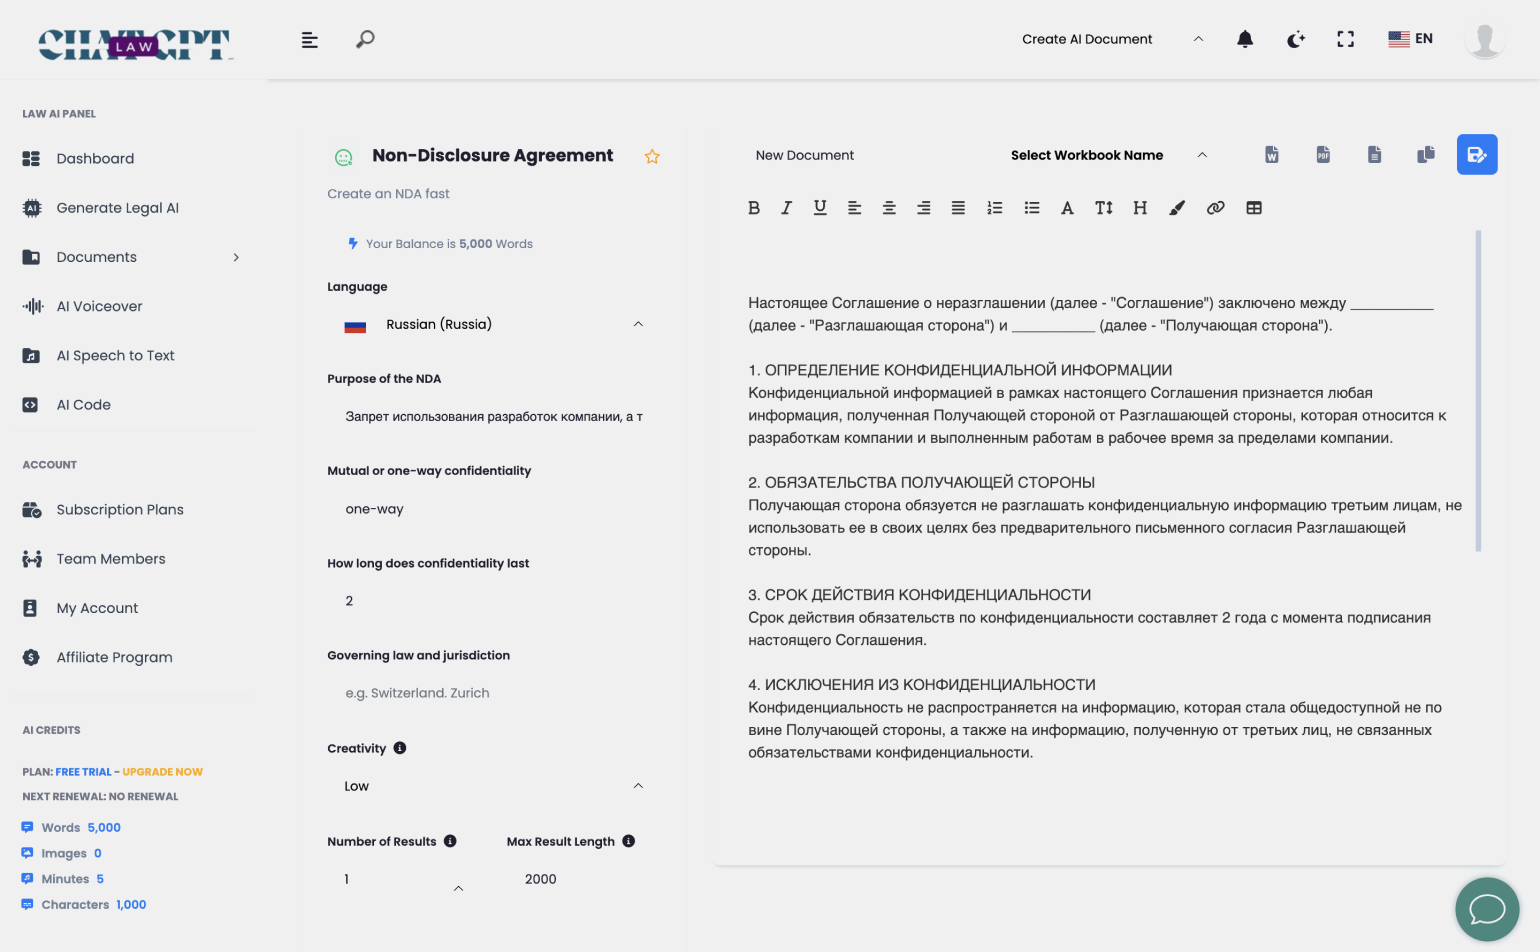

**Медицина**  
Технологии NLP используются для озвучки текста в программах и устройствах для людей с нарушениями речи.

Синтезировать речь умели и 15 лет назад, но тогда для этого комбинировали предзаписанные MP3-файлы и она звучала неестественно. С помощью NLP можно превращать текст в речь в реальном времени. А ещё для каждого пользователя можно сгенерировать оригинальный и уникальный голос на основе его собственного.

С помощью синтезатора речи общался с миром известный учёный Стивен Хокинг. Он вводил текст в программу при помощи единственной мышцы на щеке, которой ещё мог двигать. Программа подсказывала следующие фразы, ускоряя набор, и затем преобразовывала текст в речь.

### Как работает NLP
Модели по обработке естественного языка складываются из двух составляющих — данных для обучения и специальных алгоритмов. Разберём каждый из этих пунктов.


### Сбор данных
Для сбора данных дата-сайентисты используют два подхода: либо собирают их из открытых источников, например из социальных сетей, либо пользуются информацией, собранной компанией. Например, крупные онлайн-магазины могут обучать модели на истории заказов своих клиентов. Это становится возможным благодаря их объёму — информации о миллионах и десятках миллионов покупок.

Данные из открытых источников за счёт своего разнообразия помогают построить универсальные языковые модели. ChatGPT был обучен на большом массиве открытых данных, поэтому он одинаково хорошо генерирует как сказки, так и юридические документы.

Модель NLP можно собрать на данных одного человека. Например, сделать чат-бота, который будет имитировать речь и манеру общения своего живого прототипа. Инфлюенсер из США Карин Марджори сделала свою копию, которая может стать виртуальной девушкой для любого желающего — всего за один доллар в минуту. Виртуальная копия Карин обучалась на видео с её ютуб-канала.



### Подготовка данных
Полученные на предыдущем этапе неструктурированные данные, к которым относится текст, необходимо предварительно обработать. Иначе наша модель их просто не поймёт.

Процесс проходит в несколько этапов:

- **Очистка данных**. Первичные данные могут содержать в себе информацию, которая не нужна для работы или дублируется. Такие данные дата-сайентисты называют «грязными». Чем больше они загрязнены, тем сложнее модели будет понять, что важно, а что нет. Поэтому специалисты предварительно удаляют повторы, приводят строки к одному регистру и удаляют ненужные символы.

- **Токенизация**. Чтобы модель могла работать с текстом на уровне смыслов, очищенные данные разбивают на отдельные единицы — токены. Токены могут быть словами, символами, фразами или другими элементами, в зависимости от задачи и контекста.

**Примеры токенизации:**

- Разделение текста на отдельные слова: Привет, как дела? → [Привет, ,, как, дела, ?].
- Разделение текста на символы: Hello → [H, e, l, l, o].
- Разделение текста на фразы: Купите сегодня и получите скидку 20%! → [Купите сегодня, и получите скидку, 20%!].
- Разделение текста на предложения: Мама мыла раму. Папа готовил ужин. → [Мама мыла раму., Папа готовил ужин.].
- Токенизация позволяет преобразовать текст в структурированное представление, которое используется для дальнейшего анализа или обработки. Об этом мы расскажем дальше.

В русском и многих других языках есть суффиксы, которые меняют форму слова, но не его значение. Чтобы не путать программу, слова нужно привести к словарной форме — лемме, то есть провести **лемматизацию**. Например, леммой для слов «горячее» и «горячая» будет «горячий» (именительный падеж, единственное число).

**Стемминг** ― похожий процесс, когда вычленяется основа слова. Например, основа слова «горячий», «горячка», «горячо» ― «горяч».

**Лемматизация** и **стемминг** повышают эффективность обработки текстов, так как снижают количество уникальных токенов. Если мы разрабатываем поисковую систему, то можем добавить в словарь NLP-модели только одно слово «горячий», а не все его возможные формы. Модель будет работать быстрее, а памяти для хранения слов потребуется меньше.

**Разметка данных**. Каждому документу, фрагменту текста или слову, то есть токену, говоря языком дата-сайентистов, нужно присвоить метку, которая описывает, что за объект перед нами. Формат и содержание метки зависят от решаемой задачи.

Например, если мы создаём программу-переводчик, нужно указать, на каком языке написано каждое слово, а также обозначить часть речи, поскольку от этого зависит роль слова в предложении. Это помогает модели лучше ориентироваться в данных и выдавать более точные прогнозы.

**Создание датасета**. Размеченные данные перед обучением модели необходимо преобразовать в датасет — то есть структурировать.

Датасет выглядит как таблица токенов с релевантными для них признаками и метками. Для текстовых данных она хранится в формате CSV или JSON.

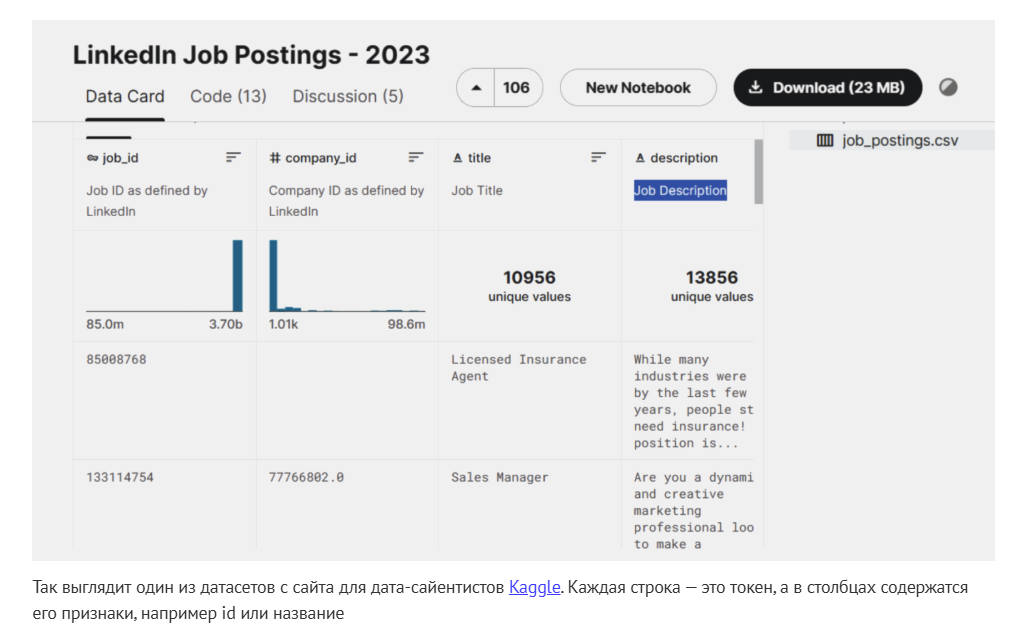

### Выбор способа представления данных
Подготовленные данные нужно представить машине так, чтобы она поняла, что от неё требуется.

Для этого можно составить терм-документную матрицу:

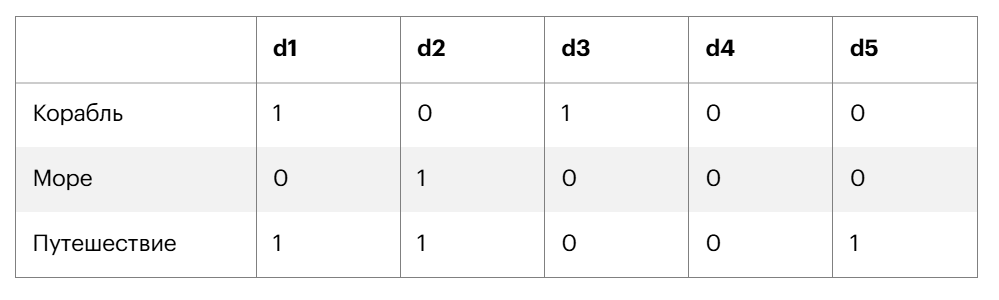

Она представляет текст в виде матрицы, где первый столбец — это токен, а первая строка — номер анализируемого документа. В ячейках на пересечении строк и столбцов показано, как часто определённые слова встречаются в конкретном документе. С помощью таких матриц тексты классифицируют по темам.

Другой популярный способ представления данных ― векторное представление слов (word embedding - https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%BB%D0%BE%D0%B2). Благодаря ему можно отследить, как анализируемые токены связаны с другими токенами в предложении или тексте.

Этот способ представления данных используется в машинном переводе, поисковых системах и чат-ботах, поскольку модель NLP в этих задачах должна воспринимать не просто отдельные слова в тексте, но и то, как они связаны между собой.



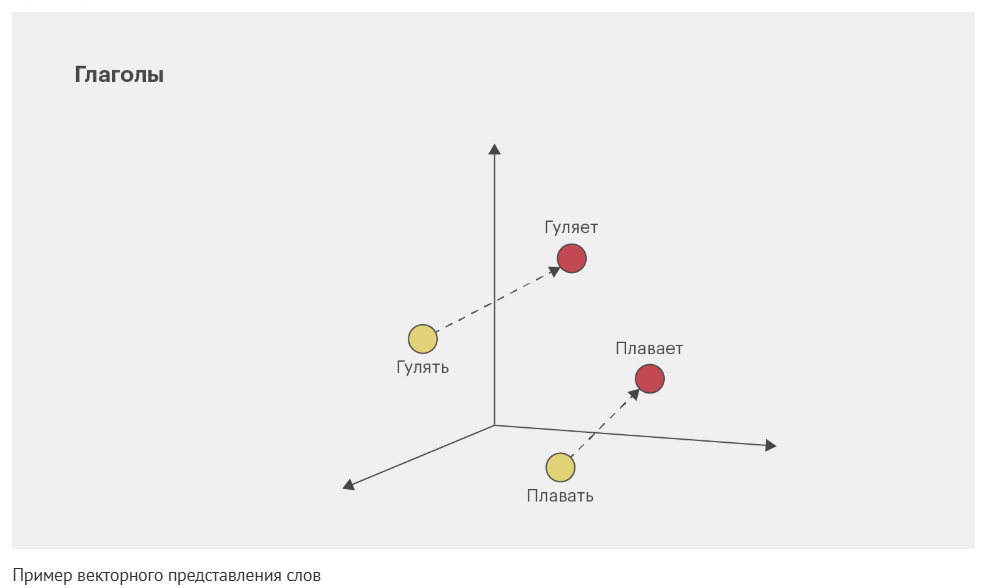

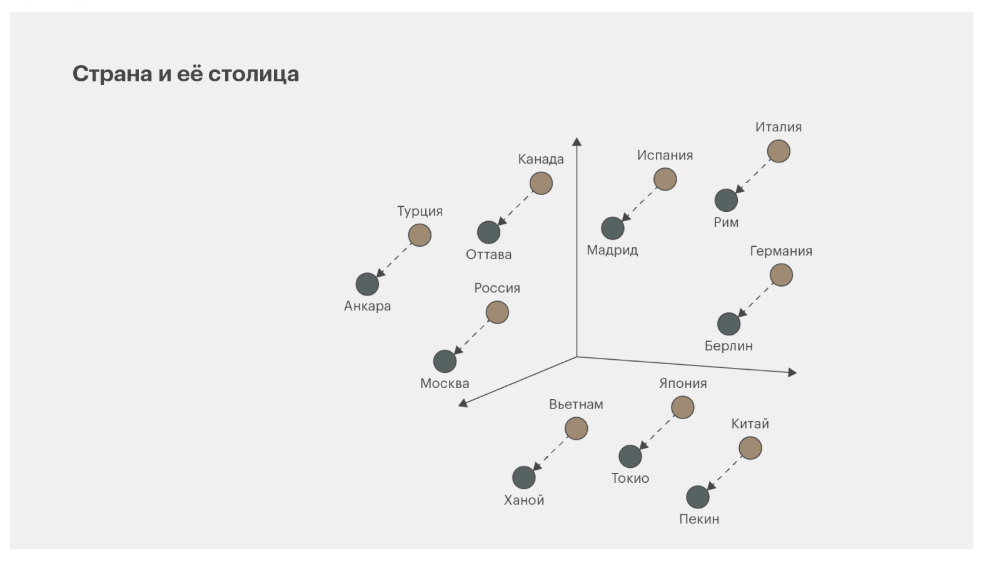

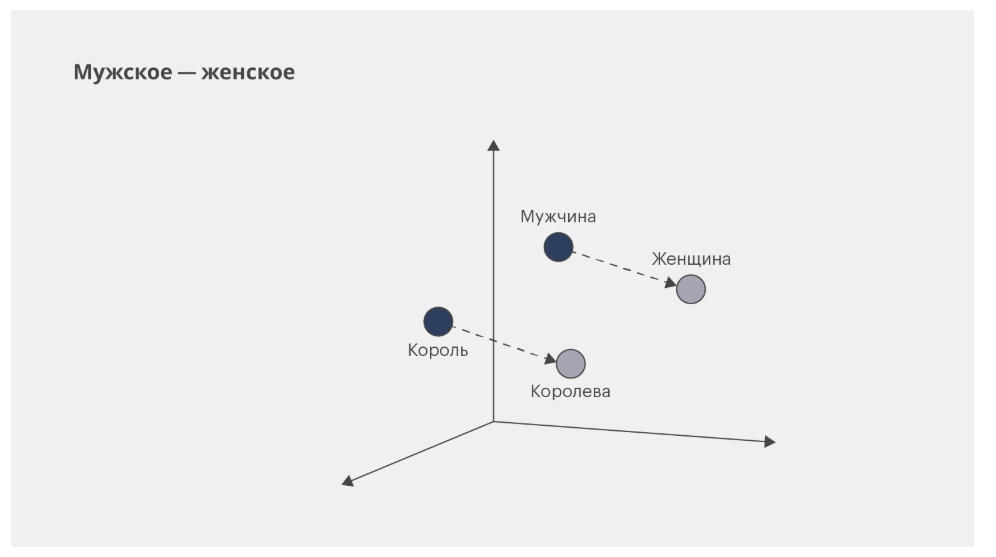

### Векторизация данных
На самом деле модели машинного обучения не умеют работать с текстовыми данными, а воспринимают только числа. Поэтому дата-сайентистам необходимо перевести токены в набор числовых значений.

Для этого существуют разные подходы. Два самых популярных — мешок слов (https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%88%D0%BE%D0%BA_%D1%81%D0%BB%D0%BE%D0%B2) и N-граммы (https://ru.wikipedia.org/wiki/N-%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0). Мешок слов просто кодирует токены в цифры, учитывая их количество, но не учитывая контекст и конкретный порядок. При использовании N-грамм слова кодируются не по одному, а по два или три за раз. Благодаря этому сохраняется структура предложений и их контекст.

### Применение алгоритмов машинного обучения
Заключительный этап работы в NLP — обучение модели на полученных данных с помощью специальных алгоритмов. Их можно написать с нуля или использовать готовые библиотеки, например NLTK, TextBlob и CoreNLP.

Для обработки естественного языка используют несколько основных алгоритмов:

* Наивный байесовский классификатор применяют для классификации текстов по тематикам на основе теории вероятностей. Например, так работают системы спам-фильтрации в электронной почте.
* Длинную цепь элементов краткосрочной памяти (LSTM, long short-term memory) используют для обработки последовательностей данных, чтобы учитывать общий контекст при обработке каждого слова. Такой подход применяют для генерации текстов.
* Нейронные сети, особенно рекуррентные нейронные сети (RNN) и трансформеры, участвуют в решении задач распознавания речи, машинного перевода и классификации текстов.
* Марковские модели применяют для анализа последовательностей слов и предсказания следующего слова в последовательности. Это полезно при переводе или генерации текста.  



Выбор алгоритма зависит от типа и масштаба задач, которые стоят перед дата-сайентистом. Например, нейронные сети используют для анализа больших объёмов данных и построения больших языковых моделей. Последние могут не только понимать человеческую речь, но и генерировать её. Одной из самых известных больших языковых моделей является GPT-4 (Generative Pre-trained Transformer 4) от компании OpenAI, на базе которой построен ChatGPT.

### Недостатки NLP
Несмотря на то что за последние годы инженерам удалось добиться больших успехов в NLP, предстоит решить ещё множество нетривиальных задач.

Компьютеры пока не понимают тонкостей значения слов, поэтому им сложно работать с омографами и омофонами: слова с разным смыслом могут иметь одинаковое написание и разное звучание или, наоборот, звучать одинаково, но написание будет различаться.

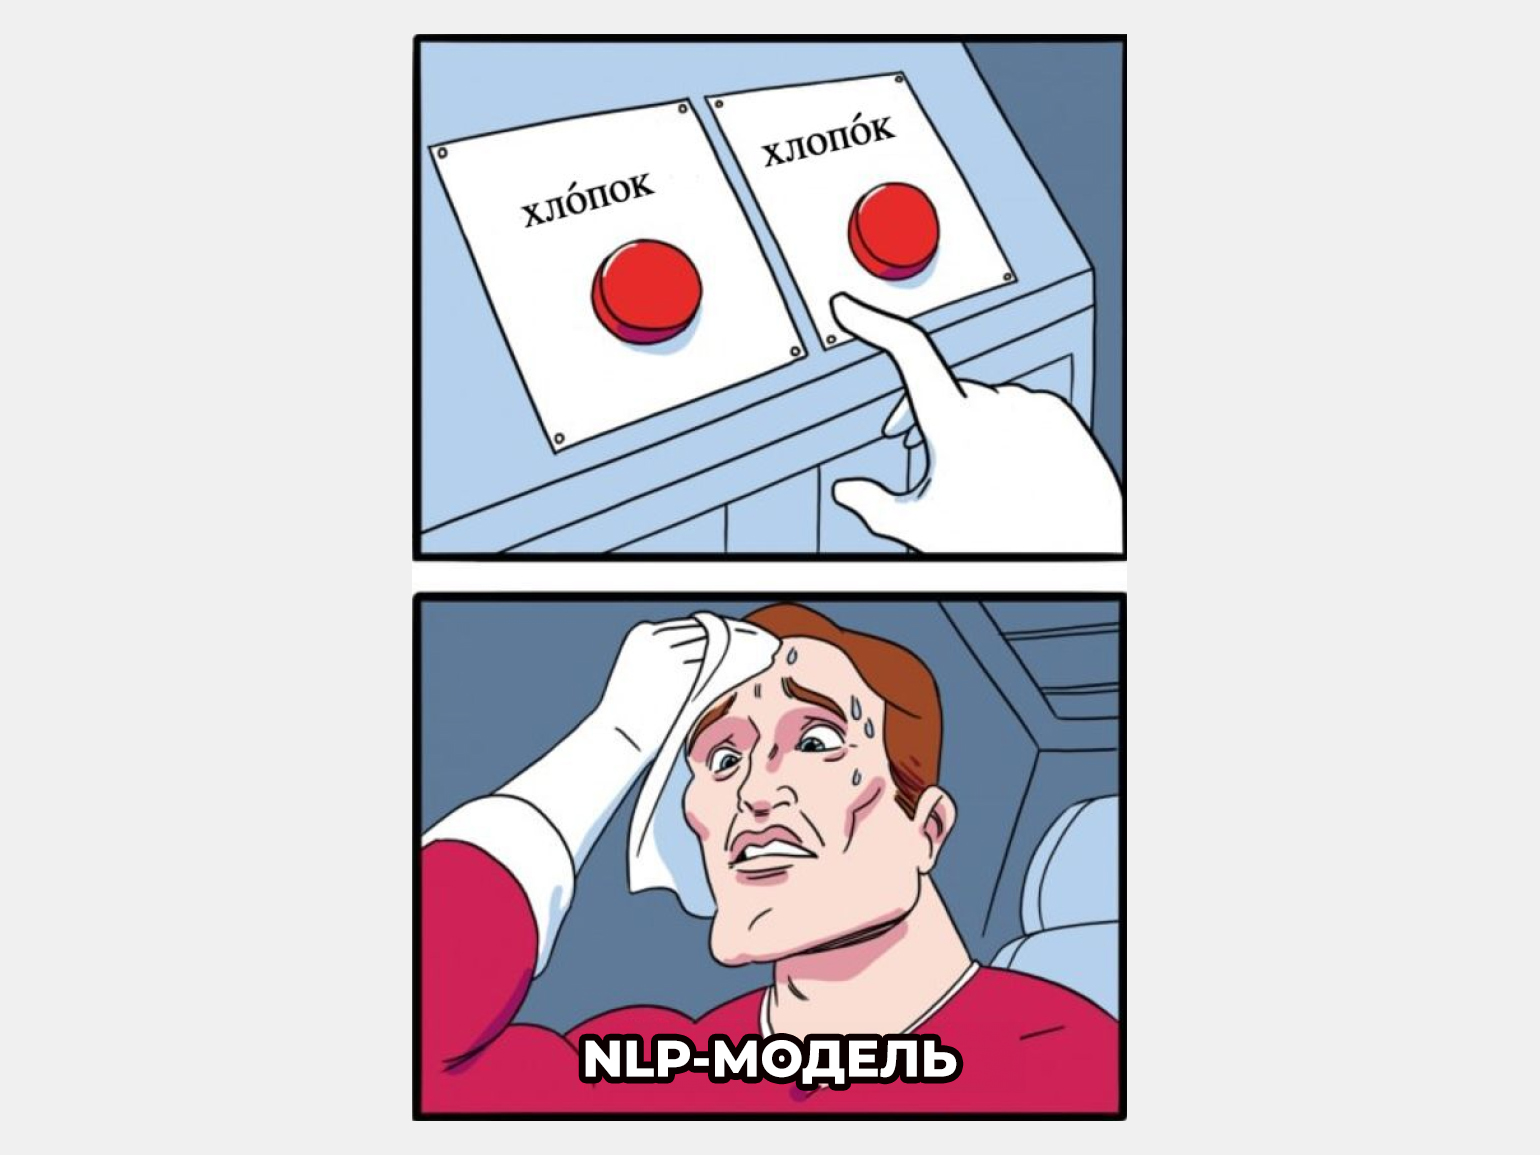

Пример проблемы с омонимами, когда написание слова совпадает, а значение различается. Компьютерам пока ещё трудно справляться с такими предложениями, как «Will, will Will will will Will Will’s will?» (пер. «Уилл, будет Уилл завещать Уиллу завещание Уилла?»). Google Translate, например, не может его правильно перевести.

К тому же понимать человеческую речь означает понимать эмоции. Одна из самых трудных для восприятия компьютером эмоций — сарказм. Модели NLP не всегда могут отличить серьёзный монолог от шутки.

### Примеры задач НЛП
1) Найти наиболее похожее предложение в файле на входное предложение: https://www.geeksforgeeks.org/find-most-similar-sentence-in-the-file-to-the-input-sentence-nlp/  

2) Техники семантического сходства: https://www.geeksforgeeks.org/different-techniques-for-sentence-semantic-similarity-in-nlp/

Языковые модели: https://blog.skillfactory.ru/gayd-po-rabote-yazykovyh-modeley/